<a href="https://colab.research.google.com/github/BeytullahYayla/Deep-Learning-Fundamentals/blob/main/Global_Ai_Hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import librosa.display
import IPython.display as ipd
import os
from IPython.utils.text import Path
import cv2 
import random
import matplotlib.image as mplim
from sklearn.model_selection import train_test_split


In [11]:
audio_file=glob('/content/drive/MyDrive/Global Ai Hub Deep Learning/*.wav')
audio_file

['/content/drive/MyDrive/Global Ai Hub Deep Learning/7061-6-0-0.wav']

In [12]:
ipd.Audio(audio_file[0])#We can play our audio using Audio method.

In [13]:
y,sr=librosa.load(audio_file[0])
print(f'y: {y[:10]}')
print(f'sr: {sr}')

y: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
sr: 22050


<b>y:</b> audio time series. Multi channel is supported.<br>
<b>sr:</b> sampling rate of y


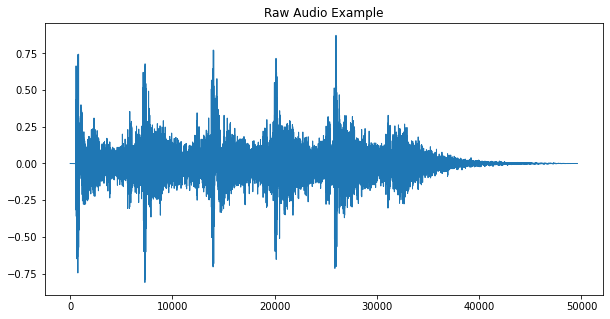

In [14]:
pd.Series(y).plot(figsize=(10,5),lw=1,title="Raw Audio Example")

In [15]:
y_trimmed,_=librosa.effects.trim(y,top_db=20)#Trim leading and trailing silence from an audio signal

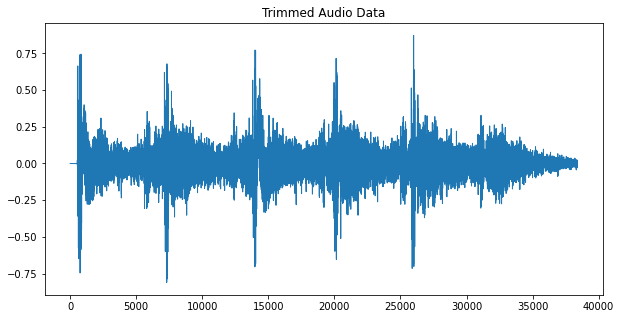

In [16]:
pd.Series(y_trimmed).plot(figsize=(10,5),lw=1,title="Trimmed Audio Data")

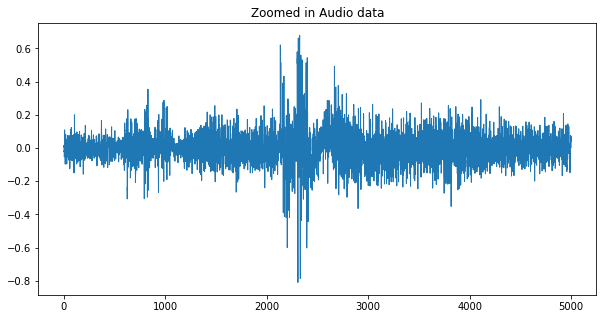

In [17]:
pd.Series(y_trimmed[5000:10000]).plot(figsize=(10,5),lw=1,title="Zoomed in Audio data")

# Spectogram

A spectrogram is a visual way of representing the signal strength of a signal over time at various frequencies present in a particular waveform.



## Fourier Transform

An audio signal is comprised of several single-frequency sound waves. When taking samples of the signal over time, we only capture the resulting amplitudes. The Fourier transform is a mathematical formula that allows us to decompose a signal into it’s individual frequencies and the frequency’s amplitude. In other words, it converts the signal from the time domain into the frequency domain. The result is called a spectrum.

In [18]:
D=librosa.stft(y)#Short time fourier transform
S_db=librosa.amplitude_to_db(np.abs(D),ref=np.max)
S_db.shape

(1025, 97)

You can think of a spectrogram as a bunch of FFTs stacked on top of each other. It is a way to visually represent a signal’s loudness, or amplitude, as it varies over time at different frequencies. There are some additional details going on behind the scenes when computing the spectrogram. The y-axis is converted to a log scale, and the color dimension is converted to decibels (you can think of this as the log scale of the amplitude). This is because humans can only perceive a very small and concentrated range of frequencies and amplitudes.

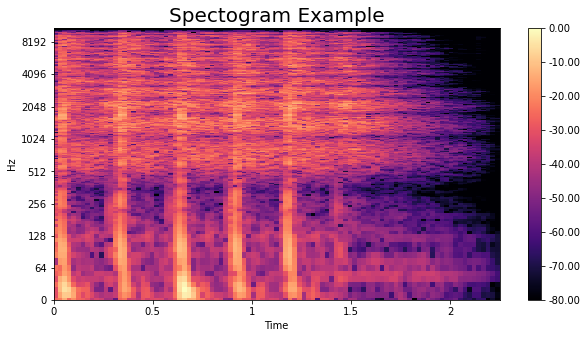

In [19]:
fig,ax=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(S_db,
                             x_axis='time',
                             y_axis='log',
                             ax=ax
                             )

ax.set_title('Spectogram Example' , fontsize=20)
fig.colorbar(img,ax=ax,format=f'%0.2f')

# Mel Spectogram

The mel spectrogram remaps the values in hertz to the mel scale. The linear audio spectrogram is ideally suited for applications where all frequencies have equal importance, while mel spectrograms are better suited for applications that need to model human hearing perception.

In [20]:
S=librosa.feature.melspectrogram(y,sr=sr,n_mels=128)
S_db=librosa.amplitude_to_db(np.abs(S),ref=np.max)
S.shape

(128, 97)

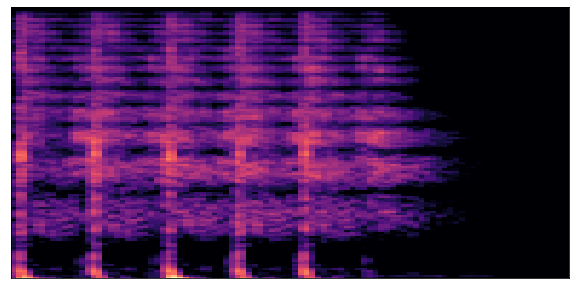

In [21]:
fig,axs=plt.subplots(figsize=(10,5))
img=librosa.display.specshow(S_db,ax=axs)

In [22]:
plt.savefig('example.png')

<Figure size 432x288 with 0 Axes>

In [23]:
df=pd.read_csv('/content/drive/MyDrive/Global Ai Hub Deep Learning/UrbanSound8K/metadata/UrbanSound8K.csv')

In [24]:
df.shape

(8732, 8)

## Creating Spectograms Folder

In [25]:
from pydoc import replace
def fold_spectograms(folder):
  spectogram_path='/content/drive/MyDrive/Global Ai Hub Deep Learning/Spectograms/'
  audio_path='/content/drive/MyDrive/Global Ai Hub Deep Learning/UrbanSound8K/audio/'
  os.mkdir(spectogram_path+'audio/'+folder)
  for audio_file in glob(f'/content/drive/MyDrive/Global Ai Hub Deep Learning/UrbanSound8K/audio/{folder}/*.wav'):
    print(audio_file)
    samples,sample_rate=librosa.load(audio_file)
    fig=plt.figure(figsize=(10,5))
    ax=fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(True)
    file_name=audio_file.replace('.wav','.png')
    file_name=file_name.replace('UrbanSound8K','Spectograms')
    
    S=librosa.feature.melspectrogram(y=samples,sr=sample_rate)
    S_db=librosa.amplitude_to_db(np.abs(S),ref=np.max)
    librosa.display.specshow(S_db)
    plt.savefig(file_name,dbi=400)
    plt.close('all')
    


In [26]:
fold_spectograms('fold1')

FileExistsError: ignored

In [27]:
folders=['fold2','fold3','fold4','fold5','fold6','fold7','fold8','fold9','fold10']


In [ ]:
for folder in folders:
  fold_spectograms(folder)

# Visualizing Spectogram Images

In [28]:
classes=['air_conditioner','car_horn','children_playing','dog_bark','drilling','engine_idling','gun_shot','jack_hammer','siren','street_music']

In [29]:
data_df=pd.read_csv('/content/drive/MyDrive/Global Ai Hub Deep Learning/UrbanSound8K/metadata/UrbanSound8K.csv')
data_df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [30]:
data_df.shape#As we can see we have 8732 labeled sound file in our metadata csv file


(8732, 8)

In [31]:
for i in range(data_df.shape[0]):
  data_df['slice_file_name'][i]=data_df['slice_file_name'][i].replace('wav','png')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
data_df.head()#In order to train our model we need to use spectogram images. Therefore we converted wav files to png files

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.png,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.png,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.png,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.png,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.png,100263,68.5,72.500000,1,5,2,children_playing


In [33]:
data_dir='/content/drive/MyDrive/Global Ai Hub Deep Learning/Spectograms/audio/'

def load_spectogram_img(df,img_data_dir):
  img_paths=[]
  classes=[]
  for i in range(df.shape[0]):
    indexed_data=df.iloc[i]
    fold_number,class_id,file_name=str(indexed_data[5]),str(indexed_data[6]),indexed_data[0]
    classes.append(class_id)
    image_path=os.path.join(data_dir,'fold'+fold_number+'/')
    image_path=os.path.join(image_path,file_name)
    img_paths.append(image_path)

  
  img_paths=np.asarray(img_paths)
  classes=np.asarray(classes)

  return img_paths,classes









In [34]:
img_paths,labels=load_spectogram_img(data_df,data_dir)

In [35]:
def visualize_image_sample(sample_path,row,col):
  fig,axs=plt.subplots(row,col,figsize=(20,10))
  for i in range(row):
    for j in range(col):
      random_index=random.randint(0,100)
      random_image=sample_path[random_index]
      random_image=mplim.imread(random_image)
      fig.tight_layout()
      axs[i][j].set_title(classes[int(labels[random_index])])
      axs[i][j].imshow(random_image)
      
      
  




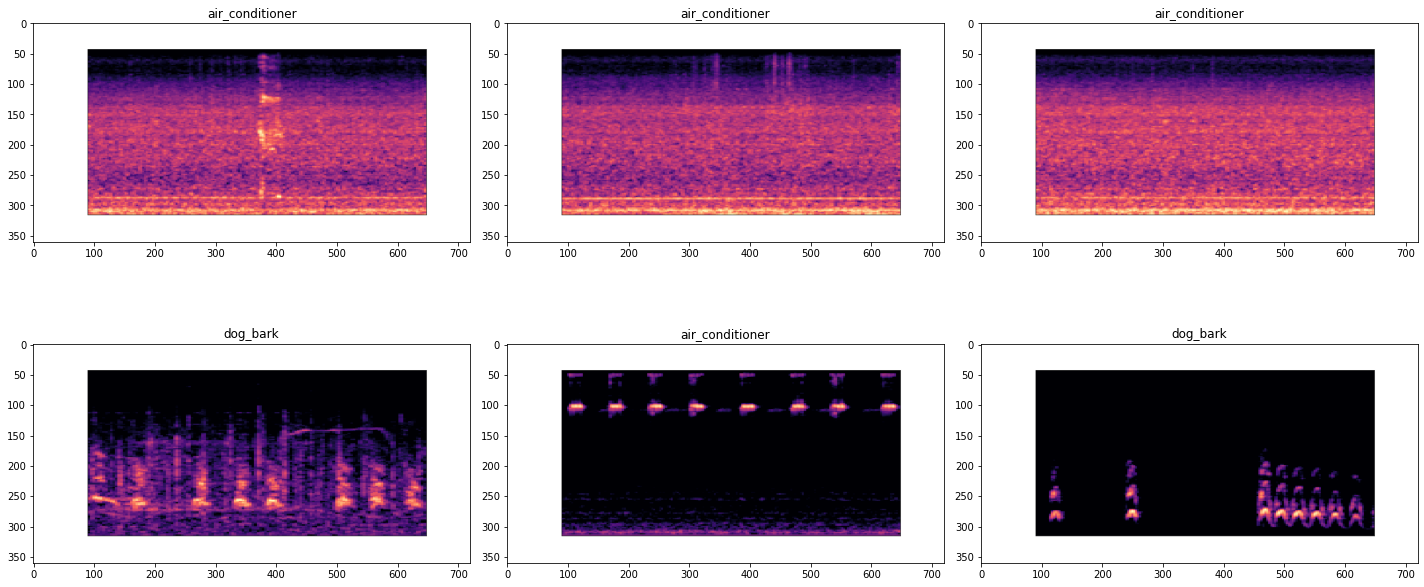

In [36]:
visualize_image_sample(img_paths,2,3)

## Train, Validation and Test Image Splitting

In [37]:
X_train,X_valid,y_train,y_valid=train_test_split(img_paths,labels,test_size=0.2,train_size=0.8,random_state=6)

In [38]:
print(f'X_train size: {len(X_train)}')
print(f'X_valid size: {len(X_valid)}')
print(f'y_train size: {len(y_train)}')
print(f'y_valid size: {len(y_valid)}')

X_train size: 6985
X_valid size: 1747
y_train size: 6985
y_valid size: 1747


In [39]:
def preprocess_images(image_to_preprocess_path):
  image_to_preprocess=cv2.imread(image_to_preprocess_path)
  image_to_preprocess = cv2.cvtColor(image_to_preprocess, cv2.COLOR_RGB2YUV)
  image_to_preprocess = cv2.GaussianBlur(image_to_preprocess,  (3, 3), 0)
  image_to_preprocess = cv2.resize(image_to_preprocess, (200, 66))
  preprocessed_image = image_to_preprocess/255
  return preprocessed_image
